# Practica 3

# Introducción

Se nos pide resolver el siguiente problema:

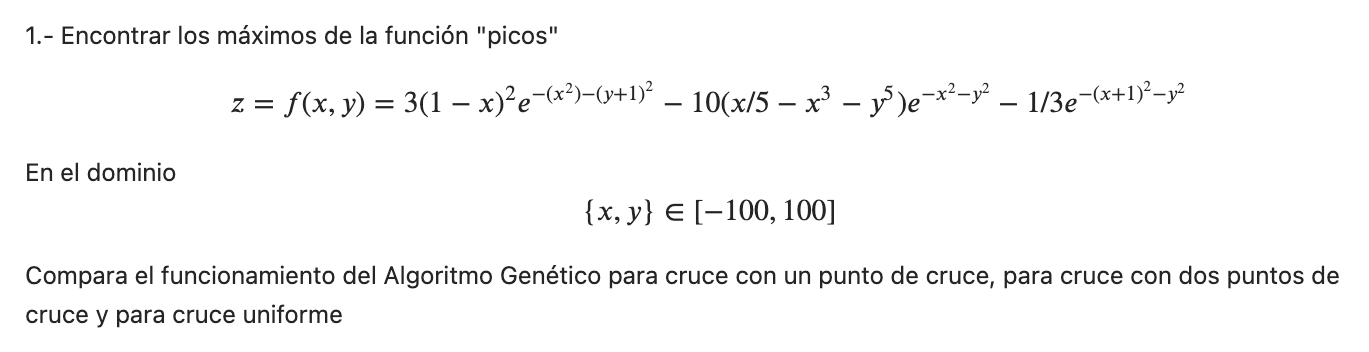

Para ello realizaremos 3 apartados distintos en los cuales realizaremos el algoritmo genetico con 1, 2 y de manera uniforme puntos de cruce respectivamente

Antes de empezar a realizar el codigo principal, implementaremos las librerias necesarias.

In [1]:
!pip install deap
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install scoop
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 615 kB 5.2 MB/s 
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78119 sha256=b217cc15b44d30fbe8a65c868823019c256f808d73a825f8b8df7f7cb75ec423
  Stored in directory: /root/.cache/pip/wheels/06/d1/b8/b4495d80f3aa67a67b8d19a900892d4f6af3c6d1bdd3cd015c
Successfully built scoop


# Algoritmo genético con 1 punto de cruce:

Comenzaremos estableciendo la función que vamos a usar para el algoritmo genético. Como podemos comprobar tambien se nos da un rango en el que podremos encontrar el valor en los que estaran las dos variables(x e y) tambien conocidos aqui como cromosoma.

In [10]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def funcion_objetivo(x):
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    ecu = 3*math.pow(1-x[0],2)*math.exp(-math.pow(x[0],2)-math.pow(x[1]+1,2))-10*(x[0]/5-math.pow(x[0],3)-math.pow(x[1],5))*math.exp(-math.pow(x[0],2)-math.pow(x[1],2))-math.exp(-math.pow(x[0]+1,2)-math.pow(x[1],2))/3
    return ecu,

Seguidamente estableceremos los valores que vamos a necesitar en la base creada por las librerias previemente importadas:

In [11]:
toolbox = base.Toolbox()

# Establecemos los valores de los genes y su selección aleatoria en el rango dado
toolbox.register("attr_uniform", random.uniform, -100, 100)

# En esta parte esttableceremos el numero de "padres" necesrios para crear la descendencia y por consecuente la próxima generación
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
# Especificamos la población inicial que vamos a utilizar
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 128)# al aumentar la poblacion inicial aumentaría el coste computacional y costaría más hallar la precisión buscada
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)#aqui establecemos la funcion que nos dará el número de puntos de corte que vamos a utilizar
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)


In [12]:
def plot_evolucion(log):
  
    gen = log.select("gen")
    fit_mins = log.select("minimo")
    fit_maxs = log.select("maximo")
    fit_ave = log.select("promedio")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generación")
    ax1.set_ylabel("Entrenamiento")
    ax1.set_ylim([-100, 100])
    ax1.legend(["minimo", "maximo", "promedio"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)


gen	nevals	promedio   	std        	minimo      	maximo     
0  	128   	1.51439e-50	1.70664e-49	-8.19747e-63	1.93843e-48
1  	70    	0.0376788  	0.424618   	-8.35154e-298	4.82288    
2  	75    	0.0376788  	0.424618   	-6.54787e-264	4.82288    
3  	76    	-0.00448323	0.0505235  	-0.573854    	4.97519e-11
4  	88    	-0.00448323	0.0505235  	-0.573854    	1.8763e-07 
5  	84    	-0.0209406 	0.103619   	-0.573854    	1.2434e-10 
6  	69    	-0.00887593	0.065073   	-0.573854    	1.2434e-10 
7  	84    	-0.0362779 	0.135811   	-0.573854    	1.8763e-07 
8  	82    	0.00827449 	0.403469   	-0.573854    	4.36861    
9  	69    	0.00696992 	0.576611   	-0.573854    	4.36861    
10 	67    	0.258767   	1.14122    	-0.573854    	4.36861    
11 	77    	0.65479    	1.81761    	-0.573854    	5.94463    
12 	75    	1.48124    	2.42591    	-0.573854    	5.94463    
13 	82    	3.07264    	2.76849    	-0.573854    	5.94463    
14 	89    	4.91803    	2.02598    	-0.470208    	5.94463    
15 	61    	5.86337    	0.6

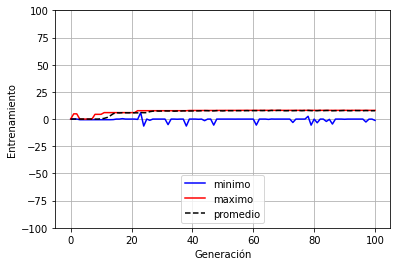

In [13]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 100
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("promedio", np.mean)
    stats.register("std", np.std)
    stats.register("minimo", np.min)
    stats.register("maximo", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

Como podemos comprobar, 

# Algoritmo genético con 2 puntos de cruce:

In [14]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def funcion_objetivo(x):
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    ecu = 3*math.pow(1-x[0],2)*math.exp(-math.pow(x[0],2)-math.pow(x[1]+1,2))-10*(x[0]/5-math.pow(x[0],3)-math.pow(x[1],5))*math.exp(-math.pow(x[0],2)-math.pow(x[1],2))-math.exp(-math.pow(x[0]+1,2)-math.pow(x[1],2))/3
    return ecu,

In [15]:
toolbox = base.Toolbox()

toolbox.register("attr_uniform", random.uniform, -100, 100)

toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 128)
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxTwoPoint)#aqui establecemos la funcion que nos dará el número de puntos de corte que vamos a utilizar
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)


In [16]:
def plot_evolucion(log):
  
    gen = log.select("gen")
    fit_mins = log.select("minimo")
    fit_maxs = log.select("maximo")
    fit_ave = log.select("promedio")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.set_xlabel("Generación")
    ax1.set_ylabel("Entrenamiento")
    ax1.set_ylim([-100, 100])
    ax1.legend(["minimo", "maximo", "promedio"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)


gen	nevals	promedio   	std        	minimo      	maximo     
0  	128   	1.51439e-50	1.70664e-49	-8.19747e-63	1.93843e-48
1  	77    	1.26266e-43	1.42295e-42	-6.09907e-315	1.61621e-41
2  	63    	1.26266e-43	1.42295e-42	-7.02766e-75 	1.61621e-41
3  	85    	7.52961e-33	8.41123e-32	-2.37673e-51 	9.55391e-31
4  	90    	3.88687e-13	4.38028e-12	-1.02639e-43 	4.97519e-11
5  	65    	3.88687e-13	4.38028e-12	-2.13312e-32 	4.97519e-11
6  	67    	8.37509e-13	6.19974e-12	-2.77507e-198	4.97519e-11
7  	73    	2.39994e-09	1.54655e-08	-2.49325e-38 	1.02229e-07
8  	79    	3.58221e-09	2.02696e-08	-4.30477e-08 	1.02229e-07
9  	78    	8.09426e-09	3.18192e-08	-6.47329e-08 	1.02229e-07
10 	74    	3.44936e-07	3.63308e-06	-6.75468e-50 	4.12849e-05
11 	78    	1.01117e-06	6.23938e-06	-7.91677e-32 	4.12849e-05
12 	81    	-0.00415439	0.0474233  	-0.538548    	0.00653429 
13 	78    	-0.000301364	0.00533072 	-0.0593364   	0.00653429 
14 	76    	-0.00241699 	0.0318878  	-0.359829    	0.00885057 
15 	76    	-0.00293563 	

99 	76    	7.77787     	1.2505     	-0.852864    	7.97136    
100	74    	7.78591     	1.19714    	2.29679e-25  	7.97136    
Mejor fitness: 7.971357
Mejor individuo [0.10738489369903759, 1.5429846925393926]


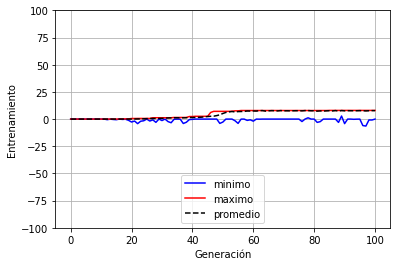

In [17]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 100
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("promedio", np.mean)
    stats.register("std", np.std)
    stats.register("minimo", np.min)
    stats.register("maximo", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

# Algoritmo genético con puntos de cruce uniforme:

In [18]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def funcion_objetivo(x):
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    ecu = 3*math.pow(1-x[0],2)*math.exp(-math.pow(x[0],2)-math.pow(x[1]+1,2))-10*(x[0]/5-math.pow(x[0],3)-math.pow(x[1],5))*math.exp(-math.pow(x[0],2)-math.pow(x[1],2))-math.exp(-math.pow(x[0]+1,2)-math.pow(x[1],2))/3
    return ecu,

In [22]:
toolbox = base.Toolbox()

toolbox.register("attr_uniform", random.uniform, -100, 100)

toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 128)
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxUniform)
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)


IndentationError: ignored

In [23]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("minimo")
    fit_maxs = log.select("maximo")
    fit_ave = log.select("promedio")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generación")
    ax1.set_ylabel("Entrenamiento")
    ax1.set_ylim([-100, 100])
    ax1.legend(["minimo", "maximo", "promedio"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)


gen	nevals	promedio   	std        	minimo      	maximo     
0  	128   	1.51439e-50	1.70664e-49	-8.19747e-63	1.93843e-48
1  	77    	1.26266e-43	1.42295e-42	-6.09907e-315	1.61621e-41
2  	63    	1.26266e-43	1.42295e-42	-7.02766e-75 	1.61621e-41
3  	85    	7.52961e-33	8.41123e-32	-2.37673e-51 	9.55391e-31
4  	90    	3.88687e-13	4.38028e-12	-1.02639e-43 	4.97519e-11
5  	65    	3.88687e-13	4.38028e-12	-2.13312e-32 	4.97519e-11
6  	67    	8.37509e-13	6.19974e-12	-2.77507e-198	4.97519e-11
7  	73    	2.39994e-09	1.54655e-08	-2.49325e-38 	1.02229e-07
8  	79    	3.58221e-09	2.02696e-08	-4.30477e-08 	1.02229e-07
9  	78    	8.09426e-09	3.18192e-08	-6.47329e-08 	1.02229e-07
10 	74    	3.44936e-07	3.63308e-06	-6.75468e-50 	4.12849e-05
11 	78    	1.01117e-06	6.23938e-06	-7.91677e-32 	4.12849e-05
12 	81    	-0.00415439	0.0474233  	-0.538548    	0.00653429 
13 	78    	-0.000301364	0.00533072 	-0.0593364   	0.00653429 
14 	76    	-0.00241699 	0.0318878  	-0.359829    	0.00885057 
15 	76    	-0.00293563 	

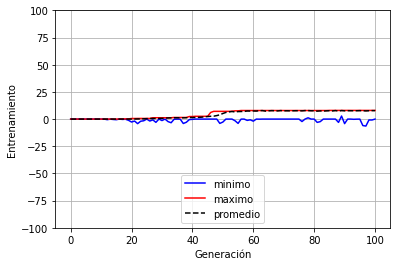

In [24]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 100
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("promedio", np.mean)
    stats.register("std", np.std)
    stats.register("minimo", np.min)
    stats.register("maximo", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

# Conclusiones:

Como podemos compobar en el algoritmo genético realizado con un unico punto de cruce tanto el mázimo con la media convergen muy pronto(a las 15 generaciones aproximadamente) mientras que mínimo se mantiene estable salvo por diversos picos que podemos hallar debido a algunas mutaciones genéticas que habrá que podrán tanto mejorar como empeorar su calidad.

Tanto el segundo como tercer algoritmo genético, es decir, los algortimos de dos cruces como el de cruces uniformes son iguales, convergiendo aproximadamene en la generación 50 y ocurriendo con el mínimo lo mismo que ocurría en el primer algoritmo.

# División de trabajo

En esta práctica mi compañero Daniel Vidal no ha realizado nada del trabajo por lo que se ha hecho en solitario